# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +  "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng,
                          "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cole harbour
Processing Record 2 of Set 1 | fukuecho
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | newman
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | jalai nur
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | jayapura
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | labytnangi
Processing Record 21 of Set 1 | flying fish cove
Processing Record 22 of Set 1 | tiksi
Processing

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lon           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cole harbour,44.6724,-63.4751,32.99,86,9,1.21,CA,1699929645
1,fukuecho,32.6881,128.8419,55.76,54,75,5.75,JP,1699929645
2,albany,42.6001,-73.9662,34.34,83,75,1.70,US,1699929575
3,ushuaia,-54.8000,-68.3000,33.46,80,20,6.91,AR,1699929551
4,newman,37.3138,-121.0208,63.28,67,50,7.18,US,1699929645


In [15]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cole harbour,44.6724,-63.4751,32.99,86,9,1.21,CA,1699929645
1,fukuecho,32.6881,128.8419,55.76,54,75,5.75,JP,1699929645
2,albany,42.6001,-73.9662,34.34,83,75,1.70,US,1699929575
3,ushuaia,-54.8000,-68.3000,33.46,80,20,6.91,AR,1699929551
4,newman,37.3138,-121.0208,63.28,67,50,7.18,US,1699929645


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

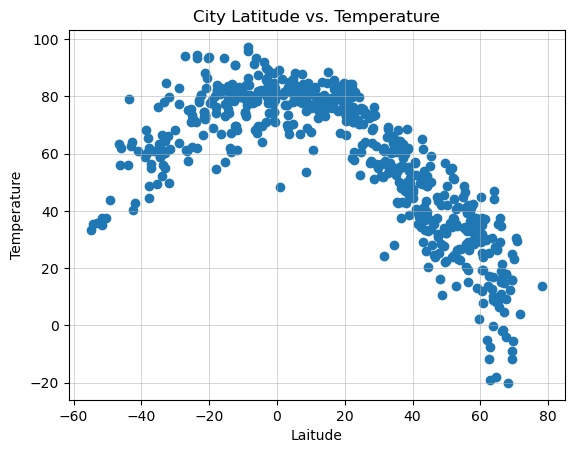

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")

plt.xlabel("Laitude")

plt.ylabel("Temperature")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

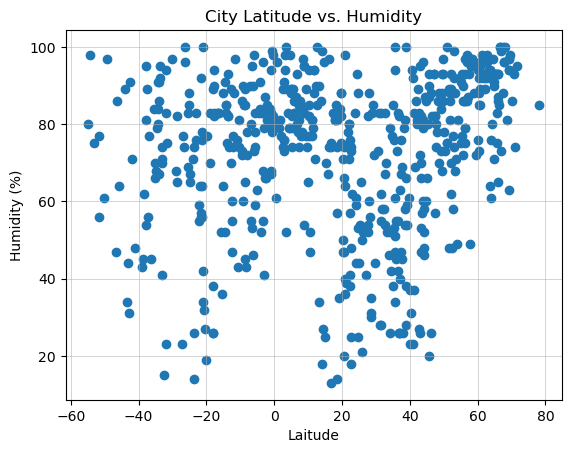

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")

plt.xlabel("Laitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

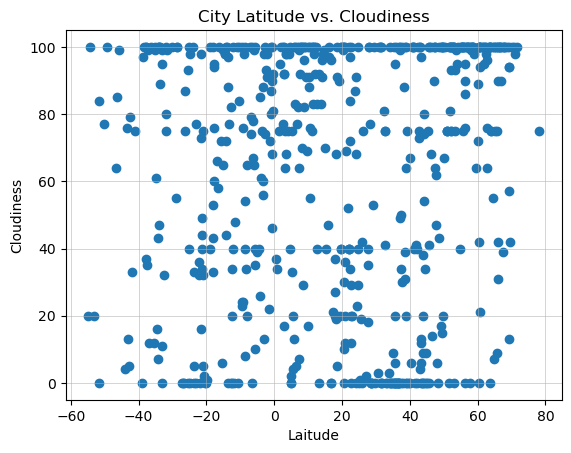

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

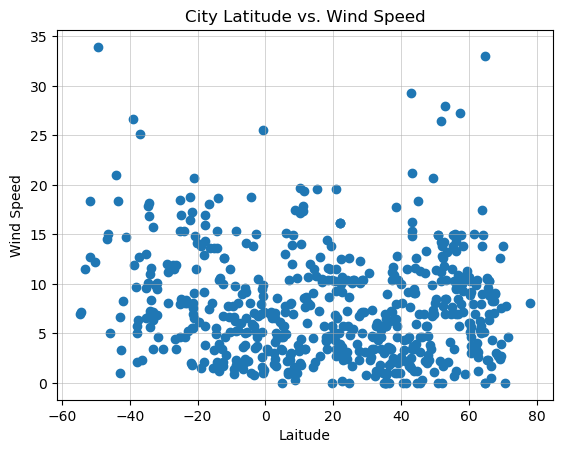

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cole harbour,44.6724,-63.4751,32.99,86,9,1.21,CA,1699929645
1,fukuecho,32.6881,128.8419,55.76,54,75,5.75,JP,1699929645
2,albany,42.6001,-73.9662,34.34,83,75,1.70,US,1699929575
4,newman,37.3138,-121.0208,63.28,67,50,7.18,US,1699929645
7,naze,28.3667,129.4833,68.92,56,77,7.11,JP,1699929646


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,33.46,80,20,6.91,AR,1699929551
5,puerto ayora,-0.7393,-90.3518,74.55,99,90,1.01,EC,1699929646
6,puerto natales,-51.7236,-72.4875,35.08,77,84,12.75,CL,1699929646
10,acarau,-2.8856,-40.1200,79.75,79,98,14.99,BR,1699929647
11,port saint john's,-31.6229,29.5448,61.54,75,99,4.63,ZA,1699929647


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


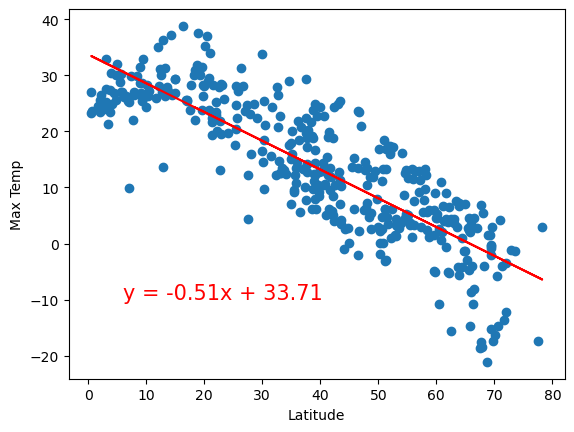

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


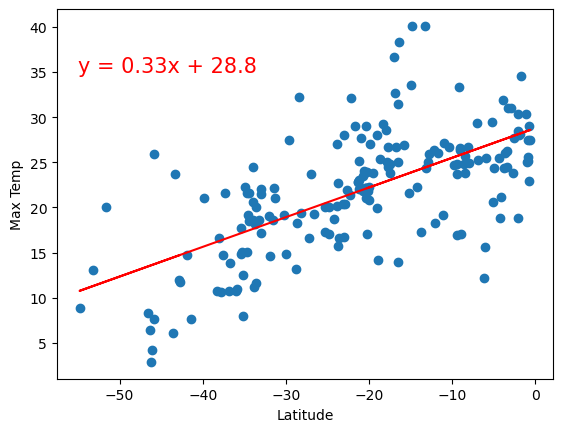

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


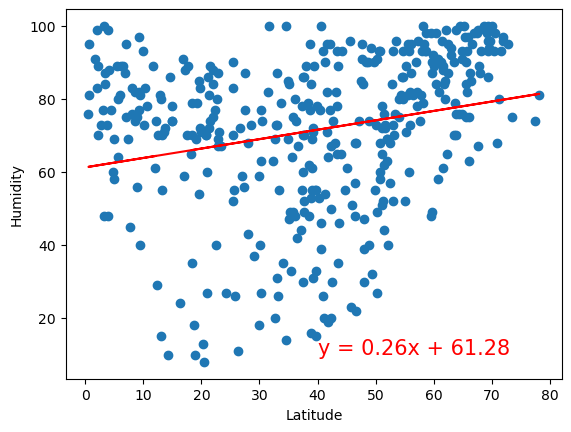

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


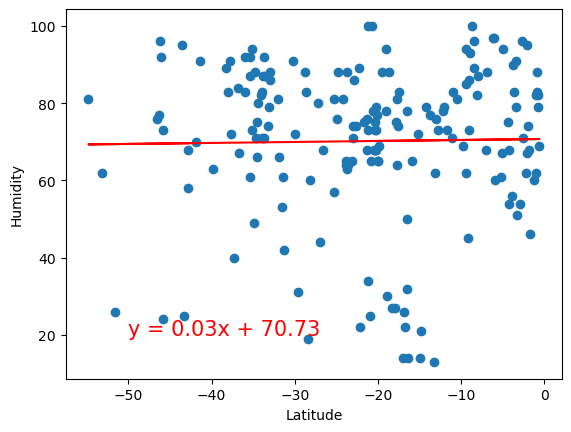

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


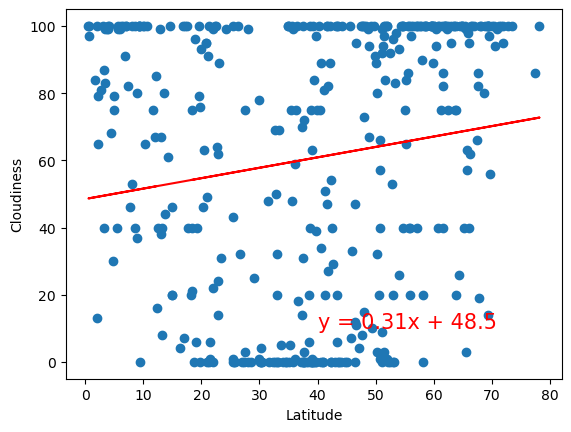

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


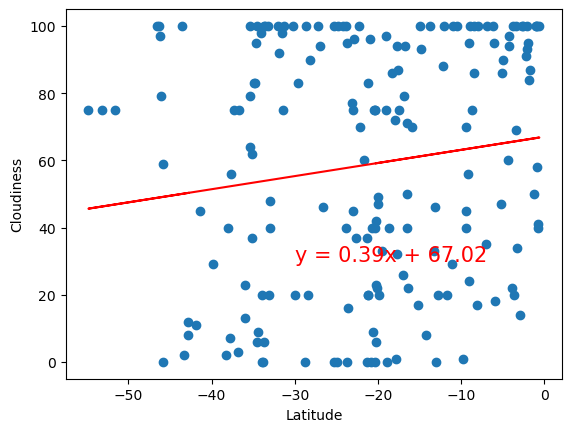

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


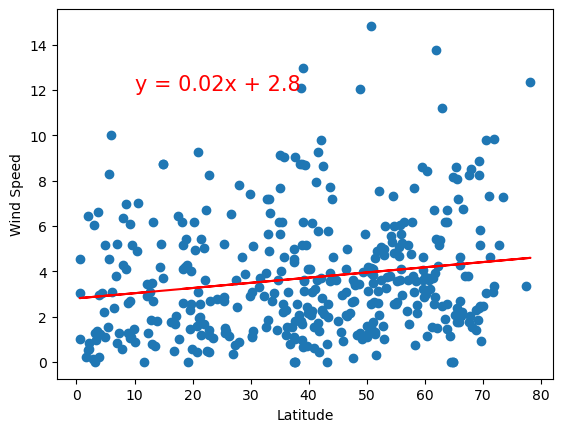

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


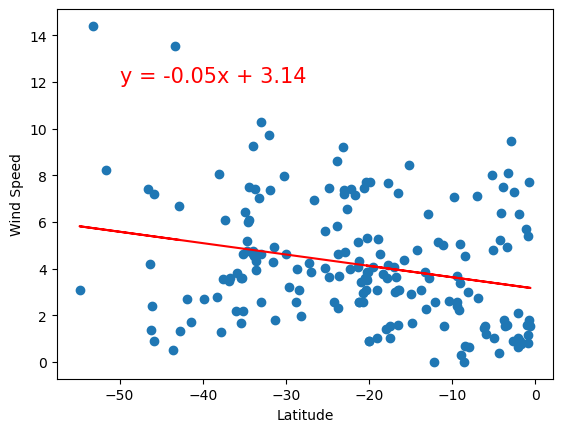

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE